## Linear_Rgression_Bike_Sharing_Assingment
### Praveena

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [4]:
bike_df = pd.read_csv("day.csv")

In [5]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_df.shape

(730, 16)

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike_df.size

11680

In [23]:
#drop columns

In [10]:
bike_df.drop(["instant","dteday","casual","registered"], axis=1,inplace=True)

In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


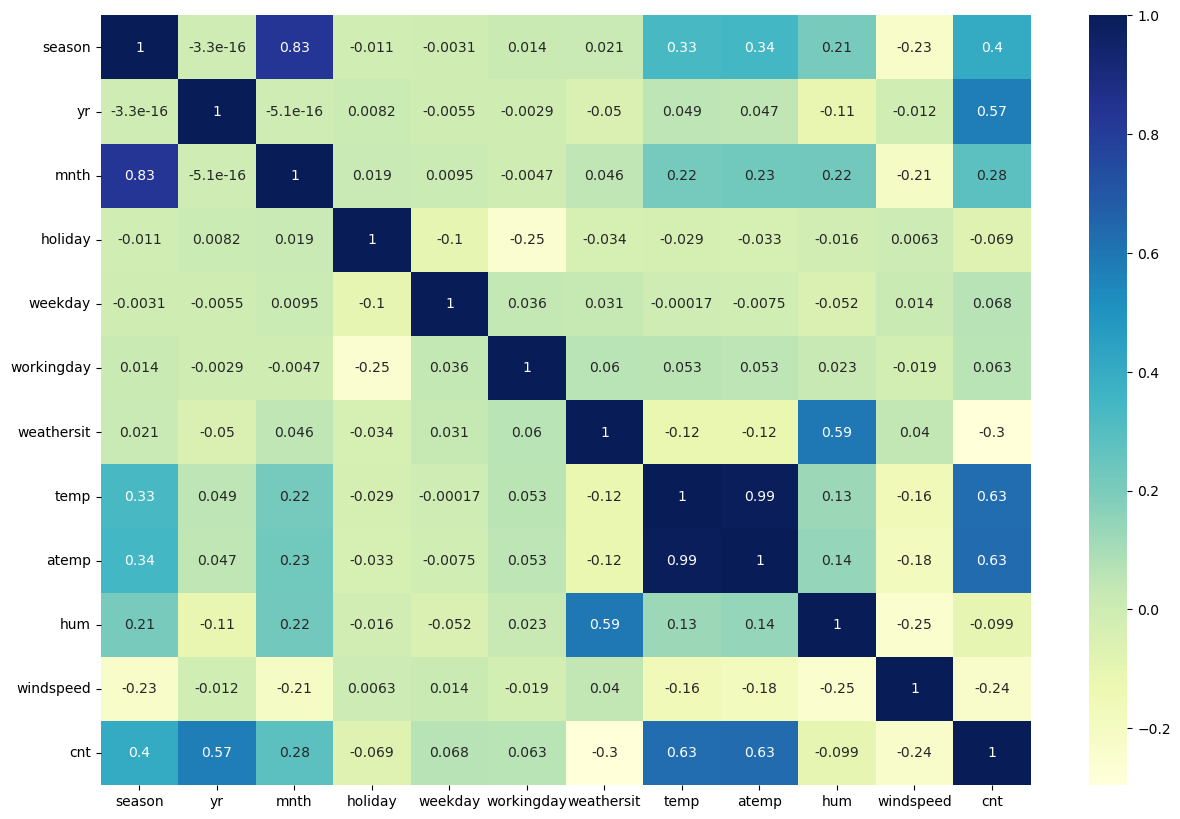

In [12]:
# Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [58]:
# Data conversion

In [13]:
#season
bike_df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)

In [14]:
#weathersit
bike_df.weathersit.replace({1:'Pleasant',2:'Moderate',3:'Bad',4:'Severe'}, inplace=True)

In [15]:
#month
bike_df.mnth.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'},inplace=True)

In [16]:
#weekday
bike_df.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

In [17]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


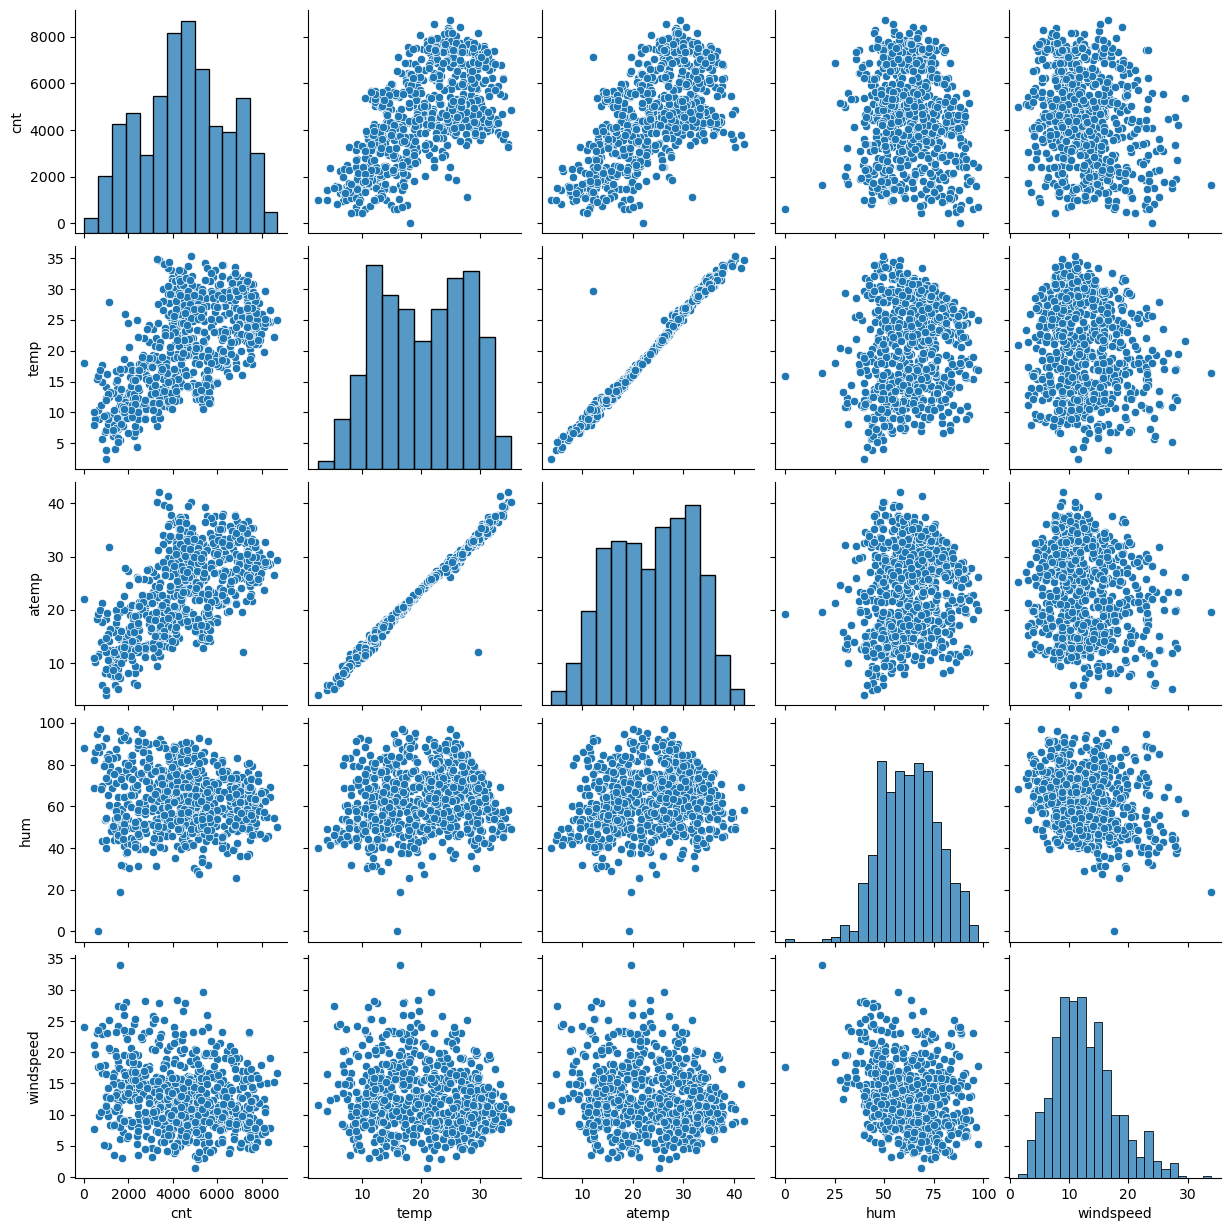

In [18]:
sns.pairplot(data=bike_df,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

## temp and atemp are having high correlation and there is alinear relationship between TEMP and ATEMP

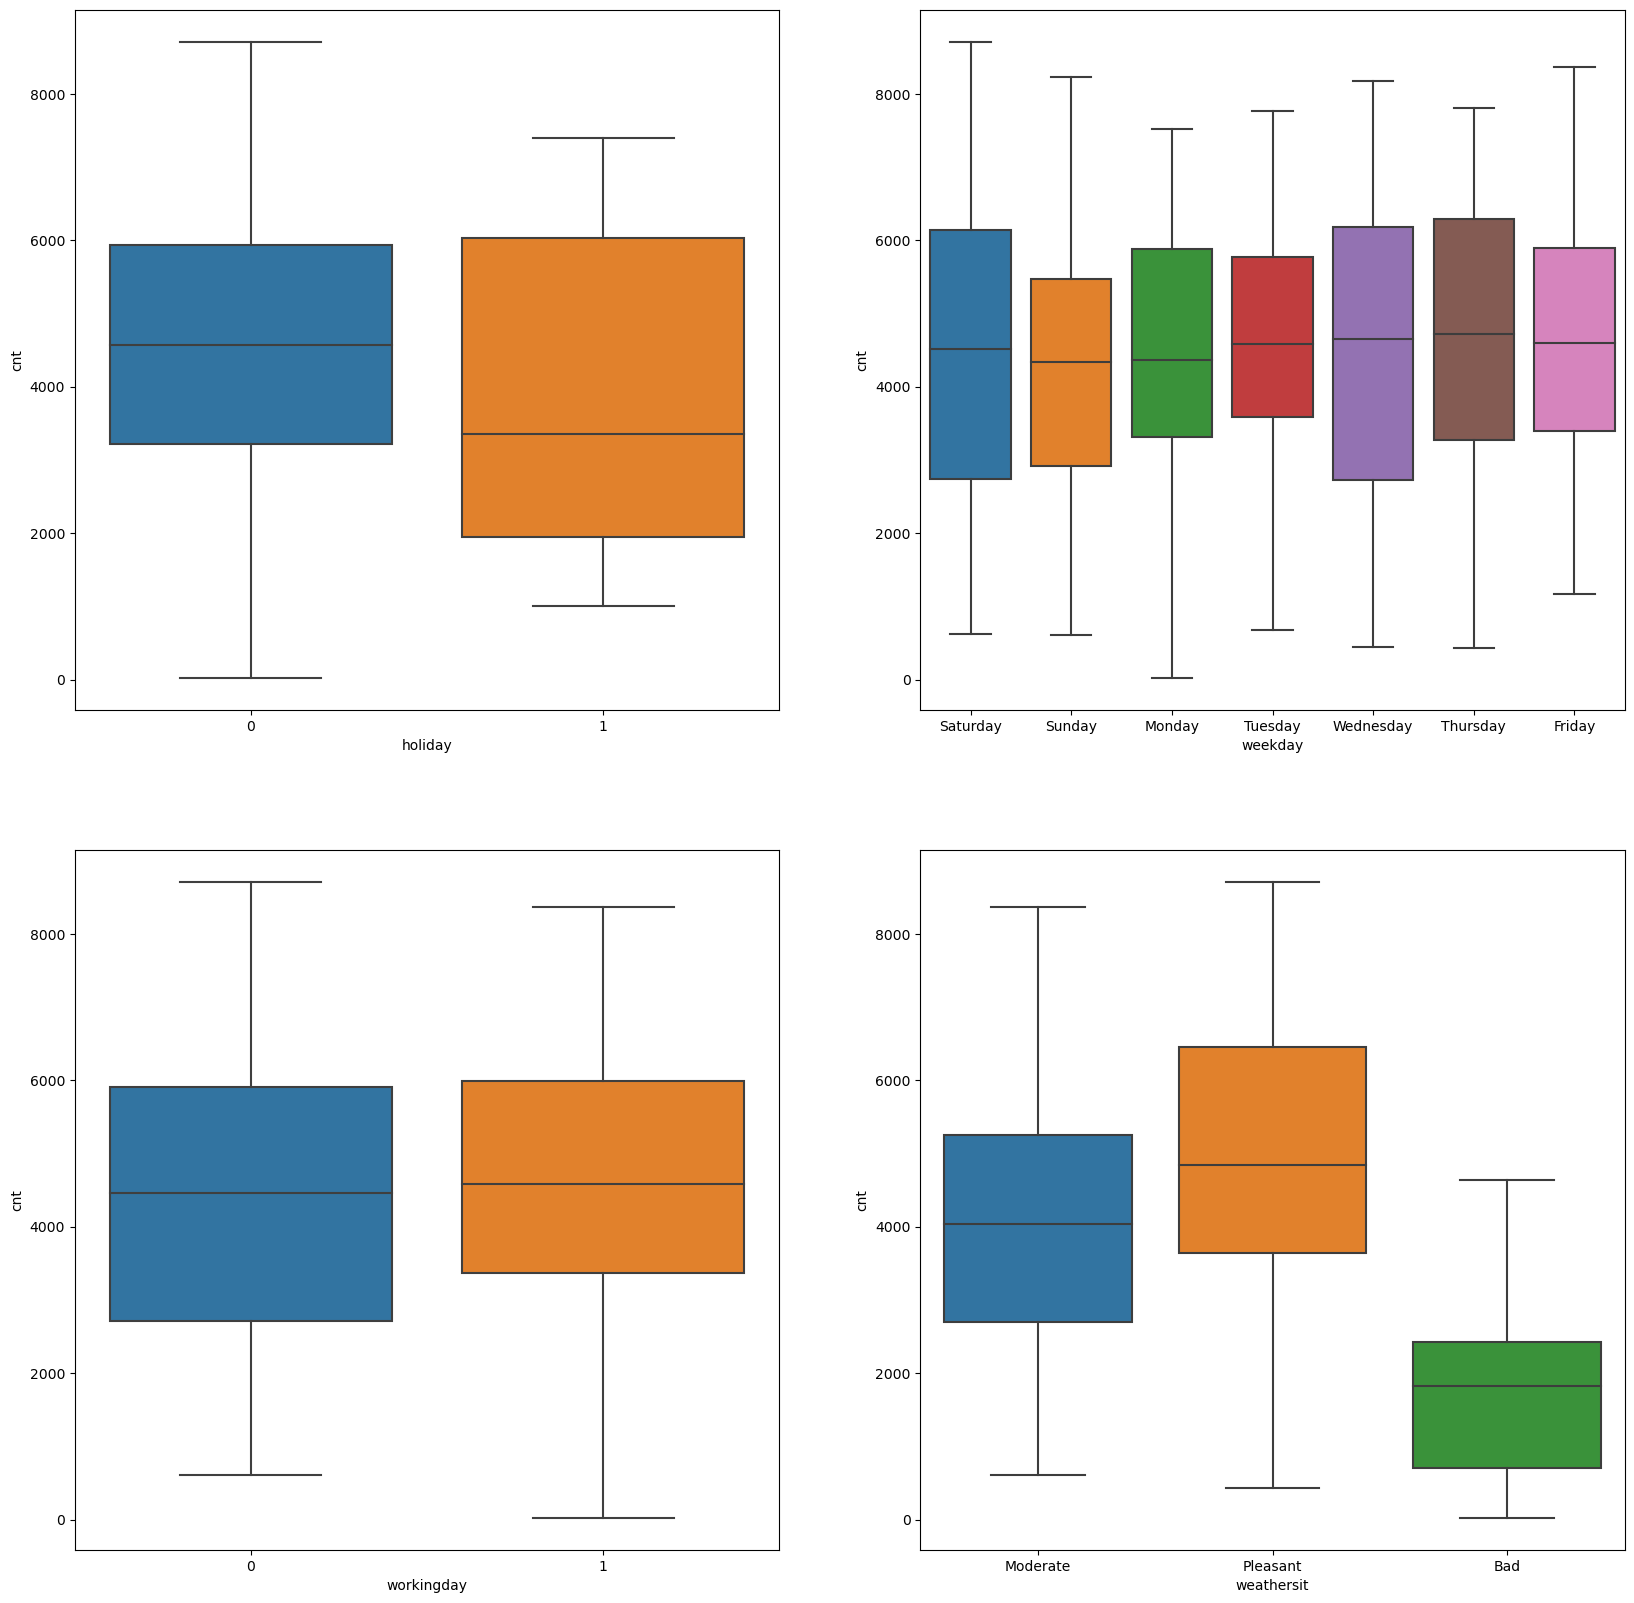

In [19]:
## Box plot

Categories = ['holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(20, 20))
for index, category in enumerate(Categories):
    plt.subplot(2, 2, index+1)
    sns.boxplot(data=bike_df, x=category, y='cnt')
plt.show()

### The count of users is less during the holidays.
###  Less users when there is heavy rain

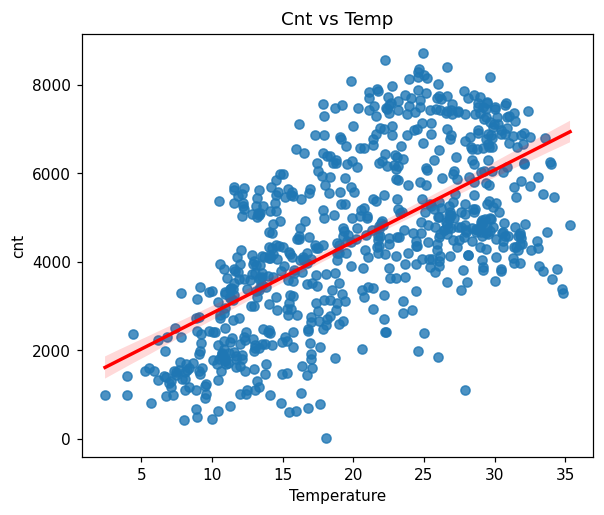

In [20]:
plt.figure(figsize=(6, 5), dpi=110)
plt.title("Cnt vs Temp", fontsize=12)  # Adjusted fontsize here
sns.regplot(data=bike_df, y="cnt", x="temp", line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

In [68]:
#Create dummy variables for categorical data

In [21]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True, dtype='int')
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"], drop_first=True, dtype='int')

In [22]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Moderate', 'weathersit_Pleasant'],
      dtype='object')

In [23]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Pleasant
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


### Splitting data into train and test data

In [76]:

#Train Test split with 70:30 ratio
train, test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [77]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


In [78]:
# scale continuous variables
num_vars = ['cnt','hum','windspeed','temp','atemp']

# Use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
train[num_vars] = scaler.fit_transform(train[num_vars])

In [79]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Pleasant
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.625490
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.484471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Moderate,weathersit_Pleasant
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


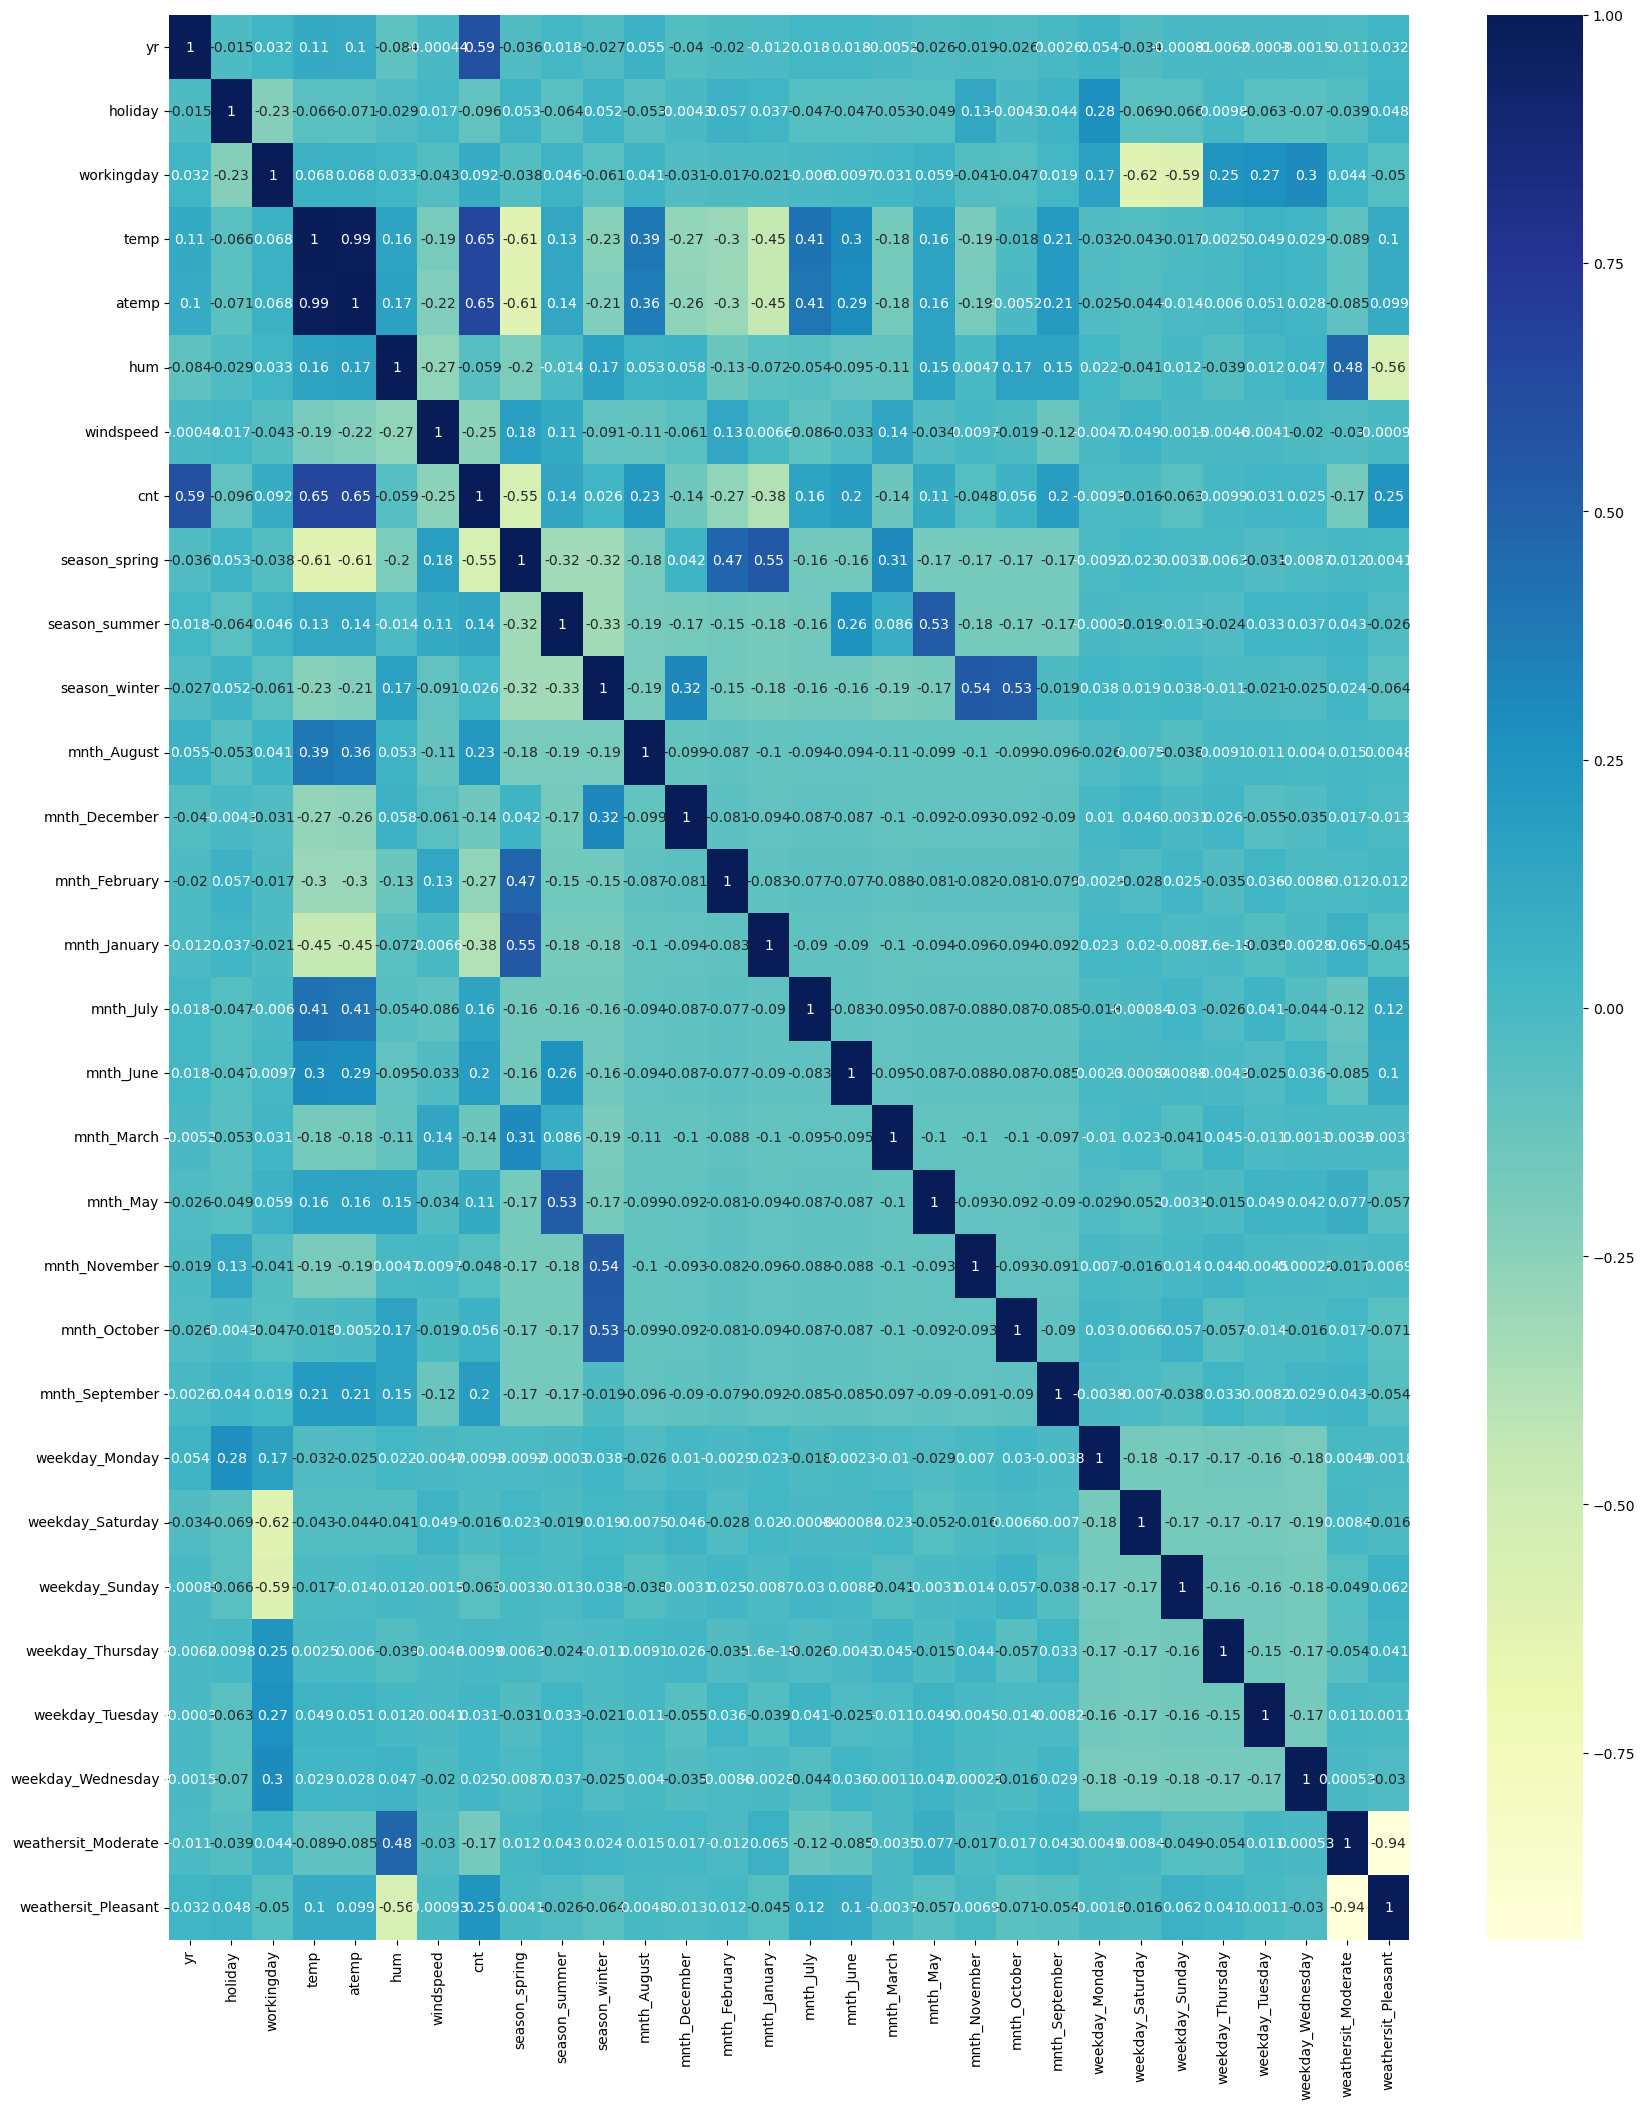

In [81]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Few variables are positively correlated and this can be good to build a regression model

In [82]:
y_train = train.pop('cnt')
X_train = train

## Building a linear model using RFE

In [83]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)


In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 14),
 ('mnth_December', False, 4),
 ('mnth_February', False, 5),
 ('mnth_January', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 10),
 ('mnth_March', False, 12),
 ('mnth_May', False, 6),
 ('mnth_November', False, 3),
 ('mnth_October', False, 15),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 13),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Moderate', True, 1),
 ('weathersit_Pleasant', True, 1)]

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Moderate', 'weathersit_Pleasant'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

## Building model using statsmodel

In [87]:

X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)



In [88]:
X_train_lm = sm.add_constant(X_train_sm)

X_train_lm.head()


,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_September,weekday_Saturday,weekday_Sunday,weathersit_Moderate,weathersit_Pleasant
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,1
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,1
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


In [89]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                510 non-null    float64
 1   yr                   510 non-null    int64  
 2   holiday              510 non-null    int64  
 3   workingday           510 non-null    int64  
 4   temp                 510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   season_spring        510 non-null    int64  
 8   season_summer        510 non-null    int64  
 9   season_winter        510 non-null    int64  
 10  mnth_July            510 non-null    int64  
 11  mnth_September       510 non-null    int64  
 12  weekday_Saturday     510 non-null    int64  
 13  weekday_Sunday       510 non-null    int64  
 14  weathersit_Moderate  510 non-null    int64  
 15  weathersit_Pleasant  510 non-null    int64 

In [90]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.11e-191
Time:                        18:52:16   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0035      0.038      0.093      0.926      -0.071       0.078
yr                      0.2298      0.008     28.647      0.000       0.214       0.246
holiday                -0.0674      0.022     -3.012      0.003      -0.111      -0.023
workingday              0.0347      0.011      3.044      0.002       0.012       0.057
temp                    0.5277      0.033     15.884      0.000       0.462       0.593
hum                    -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed              -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring          -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer           0.0537      0.015      3.631      0.000       0.025       0.083
season_winter           0.0992      0.017      5.815      0.000       0.066       0.133
mnth_July              -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_September          0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday        0.0447      0.013      3.422      0.001       0.019       0.070
weekday_Sunday         -0.0084      0.014     -0.599      0.550      -0.036       0.019
weathersit_Moderate     0.1887      0.025      7.641      0.000       0.140       0.237
weathersit_Pleasant     0.2450      0.026      9.395      0.000       0.194       0.296
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.51e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.41e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking VIF for multicollinearity
### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

In [91]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,workingday,94.54
11,weekday_Saturday,22.15
12,weekday_Sunday,21.46
14,weathersit_Pleasant,10.25
13,weathersit_Moderate,8.87
6,season_spring,5.02
1,holiday,4.66
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.62


### Typically, a Variance Inflation Factor (VIF) below 5 is considered acceptable. Given that the feature "workingday" has the highest VIF of 94.54, it will be dropped from the analysis.  weekday_Sunday has negative coefficient and high p value, it will be dropped.

## Model - 2

In [92]:
X_train_rfe = X_train_rfe.drop(['workingday','weekday_Sunday'], axis=1)

In [93]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.31e-189
Time:                        18:54:06   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0422      0.047      0.894      0.372      -0.051       0.135
yr                      0.2298      0.008     28.287      0.000       0.214       0.246
holiday                -0.0939      0.026     -3.668      0.000      -0.144      -0.044
temp                    0.5304      0.034     15.768      0.000       0.464       0.597
hum                    -0.1697      0.038     -4.494      0.000      -0.244      -0.096
windspeed              -0.1834      0.026     -7.128      0.000      -0.234      -0.133
season_spring          -0.0564      0.021     -2.706      0.007      -0.097      -0.015
season_summer           0.0532      0.015      3.553      0.000       0.024       0.083
season_winter           0.0972      0.017      5.629      0.000       0.063       0.131
mnth_July              -0.0576      0.018     -3.144      0.002      -0.094      -0.022
mnth_September          0.0830      0.017      4.963      0.000       0.050       0.116
weekday_Saturday        0.0175      0.011      1.574      0.116      -0.004       0.039
weathersit_Moderate     0.1849      0.025      7.400      0.000       0.136       0.234
weathersit_Pleasant     0.2381      0.026      9.037      0.000       0.186       0.290
==============================================================================
Omnibus:                       63.217   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.046
Skew:                          -0.687   Prob(JB):                     2.87e-30
Kurtosis:                       5.125   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,hum,24.61
2,temp,21.13
12,weathersit_Pleasant,14.10
11,weathersit_Moderate,8.74
5,season_spring,5.47
4,windspeed,4.63
7,season_winter,4.01
6,season_summer,3.18
0,yr,2.09
8,mnth_July,1.59


### Typically, a Variance Inflation Factor (VIF) below 5 is considered acceptable. Given that the feature "hum" has the highest VIF of 24.70, it will be dropped from the analysis. weekday_Saturday - Negative coefficient and high p value. It will be dropped

## Model - 3

In [95]:
X_train_rfe = X_train_rfe.drop(['hum','weekday_Saturday'], axis=1)

In [96]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.06e-187
Time:                        18:56:10   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0848      0.038     -2.239      0.026      -0.159      -0.010
yr                      0.2336      0.008     28.352      0.000       0.217       0.250
holiday                -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                    0.4910      0.033     14.770      0.000       0.426       0.556
windspeed              -0.1479      0.025     -5.887      0.000      -0.197      -0.099
season_spring          -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer           0.0465      0.015      3.051      0.002       0.017       0.076
season_winter           0.0817      0.017      4.730      0.000       0.048       0.116
mnth_July              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_September          0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_Moderate     0.2040      0.025      8.118      0.000       0.155       0.253
weathersit_Pleasant     0.2842      0.025     11.487      0.000       0.236       0.333
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
10,weathersit_Pleasant,14.02
2,temp,12.55
9,weathersit_Moderate,7.91
3,windspeed,4.59
4,season_spring,3.98
5,season_summer,2.74
6,season_winter,2.64
0,yr,2.07
7,mnth_July,1.59
8,mnth_September,1.35


### Typically, a Variance Inflation Factor (VIF) below 5 is considered acceptable. Given that the feature "weathersit_Pleasant" has the highest VIF of 14.02, it will be dropped from the analysis.

## Model -4

In [99]:
X_train_rfe = X_train_rfe.drop(['weathersit_Pleasant'], axis=1)

In [100]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.37e-163
Time:                        18:56:58   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1871      0.033      5.638      0.000       0.122       0.252
yr                      0.2390      0.009     25.862      0.000       0.221       0.257
holiday                -0.0840      0.029     -2.868      0.004      -0.142      -0.026
temp                    0.5032      0.037     13.479      0.000       0.430       0.577
windspeed              -0.1771      0.028     -6.307      0.000      -0.232      -0.122
season_spring          -0.0600      0.024     -2.524      0.012      -0.107      -0.013
season_summer           0.0494      0.017      2.887      0.004       0.016       0.083
season_winter           0.0718      0.019      3.703      0.000       0.034       0.110
mnth_July              -0.0546      0.021     -2.607      0.009      -0.096      -0.013
mnth_September          0.0673      0.019      3.527      0.000       0.030       0.105
weathersit_Moderate    -0.0669      0.010     -6.849      0.000      -0.086      -0.048
==============================================================================
Omnibus:                      136.365   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.625
Skew:                          -1.193   Prob(JB):                    2.90e-107
Kurtosis:                       7.171   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.06
6,season_winter,1.75
7,mnth_July,1.58
9,weathersit_Moderate,1.53
8,mnth_September,1.33
1,holiday,1.04


### Based on the observed VIFs and p-values, both metrics fall within acceptable ranges. Consequently, we conclude that lm_4 serves as the final model for conducting future predictions.

## Residual Analysis of the train data

In [104]:
y_train_pred = lm_4.predict(X_train_lm)

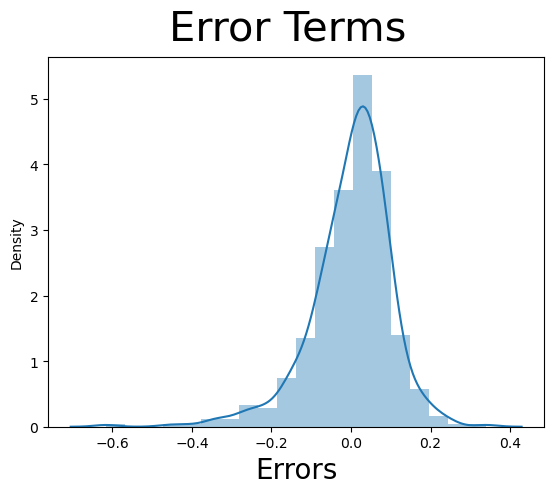

In [105]:
# Plot histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 30)  
plt.xlabel('Errors', fontsize = 20)  
plt.show()

### The error terms are visibly centered around zero and exhibit a normal distribution, aligning with the specified assumptions of linear regression.

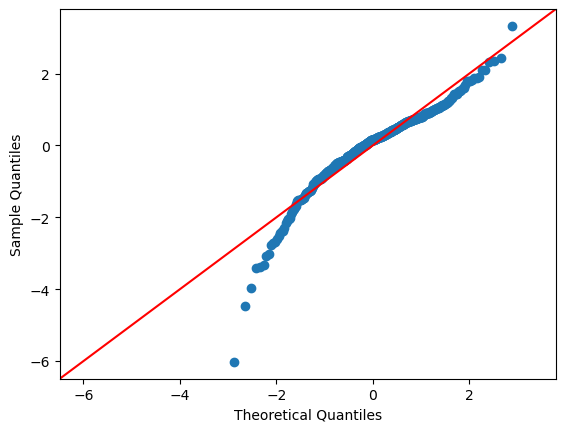

In [106]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### In this observation, the majority of data points align closely with the straight line, suggesting a normal distribution of error terms.

## Final Model - Predictions

In [107]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [108]:
y_test = test.pop('cnt')
X_test = test

In [109]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])


In [110]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                220 non-null    float64
 1   yr                   220 non-null    int64  
 2   holiday              220 non-null    int64  
 3   temp                 220 non-null    float64
 4   windspeed            220 non-null    float64
 5   season_spring        220 non-null    int64  
 6   season_summer        220 non-null    int64  
 7   season_winter        220 non-null    int64  
 8   mnth_July            220 non-null    int64  
 9   mnth_September       220 non-null    int64  
 10  weathersit_Moderate  220 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 20.6 KB


In [111]:
y_test_pred = lm_4.predict(X_test)

## Calculate R-Squared

In [112]:
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.7916358485391679
r2_score of test dataset 0.7777501913564924


## R2 score has negligible difference, so we can infer this is the good to go model

## Model Evaluation

Text(0, 0.5, 'y_pred')

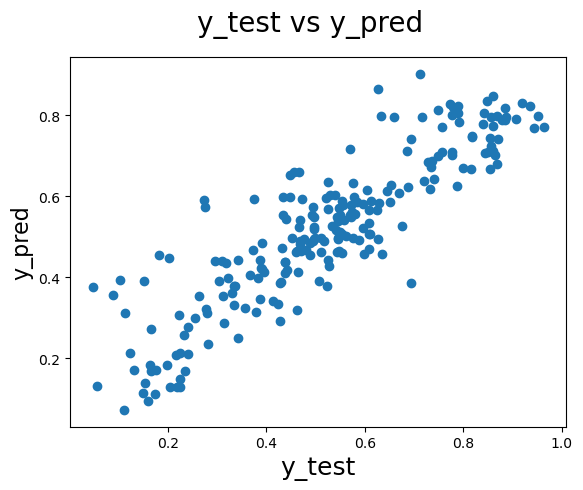

In [113]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)